In [1]:
import ROOT
import uproot
import numpy as np
import array as array
import math
import matplotlib.pyplot as plt
import pickle
import hist
import mplhep as hep
#import statistics as st
ROOT.gStyle.SetOptStat(000000)

objc[25959]: Class RunStopper is implemented in both /Users/ren/Applications/root/lib/libCore.6.28.06.so (0x10f995148) and /usr/local/lib/libCore.so (0x128aa51f0). One of the two will be used. Which one is undefined.


Welcome to JupyROOT 6.28/06


In [2]:
import pickle as pkl
with open("coffeaOutput/dijetHists_wXSscaling_QCDsim_2.5_newMandPtBins_rapiditypythia_nominal2018.pkl", "rb") as f:
    result = pkl.load( f )
    
with open("coffeaOutput/dijetHists_JetHT_newMandPtBins_rapidity2.5_nominal2018.pkl", "rb") as f:
    result_data = pkl.load( f )
    
    
with open("coffeaOutput/dijetHists_wXSscaling_QCDsim_rap2.5_JMRJMS_pythia_nominal_JK_2018.pkl", "rb") as f:
    result0to9 = pkl.load( f )

In [3]:
response_matrix_u, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges = result['response_matrix_u'][{'syst':"nominal"}].project("ptreco", "mreco", "ptgen\
", "mgen").to_numpy()

n_ptreco_bin = len(ptreco_edges)-1
n_mreco_bin= len(mreco_edges)-1
n_ptgen_bin = len(ptgen_edges)-1
n_mgen_bin= len(mgen_edges)-1

In [4]:
detectorBinning = ROOT.TUnfoldBinning("detector")
recoBinning = detectorBinning.AddBinning("reco")                                                                                  
recoBinning.AddAxis("m_{RECO}", n_mreco_bin, mreco_edges, False, False) # mreco                                                                           
recoBinning.AddAxis("pt_{RECO}", n_ptreco_bin, ptreco_edges, False, False) # ptreco                                                                       
                                                                                           
generatorBinning = ROOT.TUnfoldBinning("generator")                                                                                              
genBinning = generatorBinning.AddBinning("gen")                                                                                     
genBinning.AddAxis("m_{GEN}", n_mgen_bin, mgen_edges, False, False) #mgen                                                                                 
genBinning.AddAxis("pt_{GEN}", n_ptgen_bin, ptgen_edges, False, False) #ptgen 

True

In [5]:
ptreco_center = result['response_matrix_g'].project('ptreco').axes[0].centers
ptreco_width = result['response_matrix_g'].project('ptreco').axes[0].widths
ptgen_center = result['response_matrix_g'].project('ptgen').axes[0].centers
ptgen_width = result['response_matrix_g'].project('ptreco').axes[0].widths

mreco_center = result['response_matrix_g'].project('mreco').axes[0].centers
mreco_edge = result['response_matrix_g'].project('mreco').axes[0].edges
mreco_width = result['response_matrix_g'].project('mreco').axes[0].widths

mgen_center = result['response_matrix_g'].project('mgen').axes[0].centers
mgen_width = result['response_matrix_g'].project('mgen').axes[0].widths

In [6]:
M = ROOT.TUnfoldBinning.CreateHistogramOfMigrations(generatorBinning,detectorBinning,"M")


h = detectorBinning.CreateHistogram("h")

hup = detectorBinning.CreateHistogram("hup")
hdn = detectorBinning.CreateHistogram("hdn")



htrue = generatorBinning.CreateHistogram("htrue")
htruef = detectorBinning.CreateHistogram("htruef")

In [7]:
result0to9['response_matrix_u'][{"jk": 0, "syst":"nominal"}]

Hist(
  Variable([200, 260, 350, 430, 540, 630, 690, 750, 810, 13000], name='ptreco', label='p_{T,RECO} (GeV)'),
  Variable([0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 250, 300, 800, 1300], name='mreco', label='m_{RECO} (GeV)'),
  Variable([200, 260, 350, 430, 540, 630, 690, 750, 810, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 150, 200, 300, 1300], name='mgen', label='m_{GEN} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=1245.86, variance=92926.6)

In [8]:
closure = True
groomed = False

if not groomed:
    jk_dic = {}
    for i in range(10):
        print(i)
        Msyst = result0to9['response_matrix_u'][{"jk": i, "syst":"nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value
        jk_dic.update({str(i):Msyst})
        
    matrix_combined = np.stack(list(jk_dic.values()), axis = 0)
    rms = np.std(matrix_combined, axis = 0)
    rms = np.sqrt(10/9)*rms
    
    M_np = result['response_matrix_u'][{"syst": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value
    M_np_error = rms



    n_bin_det = M_np.shape[2]*M_np.shape[3]
    n_bin_gen =  M_np.shape[0]*M_np.shape[1]


    if closure:
        h_np = result['ptreco_mreco_u'][{"syst": "nominal"}].project("mreco","ptreco").view(flow=True).value
        h_np_error = result['ptreco_mreco_u'][{"syst": "nominal"}].project("mreco","ptreco").view(flow=True).variance
        h_np_error = np.sqrt(h_np_error)
    else:
        h_np = result_data['ptreco_mreco_u'][{"syst": "nominal"}].project("mreco","ptreco").view(flow=True).value
        h_np_error = result_data['ptreco_mreco_u'][{"syst": "nominal"}].project("mreco","ptreco").view(flow=True).variance
        h_np_error = np.sqrt(h_np_error)

    # htrue_np = np.sum(output['response_matrix_g'][{"systematic": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value, (2,3))
    # htrue_np_error = np.sum(output['response_matrix_g'][{"systematic": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).variance, (2,3))
    # htrue_np_error = np.sqrt(htrue_np_error)

    htrue_np =result['response_matrix_u'][{"syst": "nominal"}].project("mgen","ptgen").view(flow=True).value
    htrue_np_error = result['response_matrix_u'][{"syst": "nominal"}].project("mgen","ptgen").view(flow=True).variance
    htrue_np_error = np.sqrt(htrue_np_error)
elif groomed:
    jk_dic = {}
    for i in range(10):
        print(i)
        Msyst = result0to9['response_matrix_g'][{"jk": i, "syst":"nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value
        jk_dic.update({str(i):Msyst})
        
    matrix_combined = np.stack(list(jk_dic.values()), axis = 0)
    rms = np.std(matrix_combined, axis = 0)
    rms = np.sqrt(10/9)*rms
    
    M_np = result['response_matrix_g'][{"syst": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value
    M_np_error = rms
    



    n_bin_det = M_np.shape[2]*M_np.shape[3]
    n_bin_gen =  M_np.shape[0]*M_np.shape[1]


    if closure:
        h_np = output['ptreco_mreco_g'][{"syst": "nominal"}].project("mreco","ptreco").view(flow=True).value
        h_np_error = output['ptreco_mreco_g'][{"syst": "nominal"}].project("mreco","ptreco").view(flow=True).variance
        h_np_error = np.sqrt(h_np_error)
    else:
        h_np = result_data['ptreco_mreco_u'][{"syst": "nominal"}].project("mreco","ptreco").view(flow=True).value
        h_np_error = result_data['ptreco_mreco_u'][{"syst": "nominal"}].project("mreco","ptreco").view(flow=True).variance
        h_np_error = np.sqrt(h_np_error)

    # htrue_np = np.sum(output['response_matrix_g'][{"systematic": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).value, (2,3))
    # htrue_np_error = np.sum(output['response_matrix_g'][{"systematic": "nominal"}].project("mgen","ptgen","mreco","ptreco").view(flow=True).variance, (2,3))
    # htrue_np_error = np.sqrt(htrue_np_error)

    htrue_np =result['response_matrix_g'][{"syst": "nominal"}].project("mgen","ptgen").view(flow=True).value
    htrue_np_error = result['response_matrix_g'][{"syst": "nominal"}].project("mgen","ptgen").view(flow=True).variance
    htrue_np_error = np.sqrt(htrue_np_error)

0
1
2
3
4
5
6
7
8
9


In [9]:
list_reco = []
list_gen = []
integral = 0
for i in range(M_np.shape[0]-2): #mgen
    for j in range(M_np.shape[1]-1): #ptgen
        for k in range(M_np.shape[2]-2): #mreco
            for l in range(M_np.shape[3]-1): #ptreco
                
                mgen = mgen_center[i]
                if j == 0:
                    ptgen = 1
                else:
                    ptgen = ptgen_center[j-1]
                mreco = mreco_center[k]
                if l == 0:
                    ptreco = 1
                else:
                    ptreco = ptreco_center[l-1]
    
                # glob_reco = detectorDistribution.GetGlobalBinNumber(mreco_center[k], ptreco_center[l])
                # glob_gen = signalBinning.GetGlobalBinNumber(mgen_center[i], ptgen_center[j])
                glob_reco = recoBinning.GetGlobalBinNumber(mreco, ptreco)
                glob_gen = genBinning.GetGlobalBinNumber(mgen, ptgen)
                #rint(glob_gen, glob_reco)
                # list_reco.append(glob_reco)
                # list_gen.append(glob_gen)
                integral = integral + M_np[i+1][j][k+1][l]
                M.SetBinContent(glob_gen, glob_reco, M_np[i+1][j][k+1][l])
                M.SetBinError( glob_gen, glob_reco, M_np_error[i+1][j][k+1][l])
print(integral)                
jk_dic_root = {}                      
for i_jk in range(10):  
    jk_dic_root.update({str(i_jk): ROOT.TUnfoldBinning.CreateHistogramOfMigrations(generatorBinning,detectorBinning,str(i_jk))})
    for i in range(M_np.shape[0]-2): #mgen
        for j in range(M_np.shape[1]-1): #ptgen
            for k in range(M_np.shape[2]-2): #mreco
                for l in range(M_np.shape[3]-1): #ptreco
                    
                    mgen = mgen_center[i]
                    if j == 0:
                        ptgen = 1
                    else:
                        ptgen = ptgen_center[j-1]
                    mreco = mreco_center[k]
                    if l == 0:
                        ptreco = 1
                    else:
                        ptreco = ptreco_center[l-1]

                    glob_reco = recoBinning.GetGlobalBinNumber(mreco, ptreco)
                    glob_gen = genBinning.GetGlobalBinNumber(mgen, ptgen)
                    jk_dic_root[str(i_jk)].SetBinContent(glob_gen, glob_reco, jk_dic[str(i_jk)][i+1,j,k+1,l])
                    #jk_dic_root[str(i_jk)].SetBinError(glob_gen, glob_reco, resp_syst_dic_np_error[sys][i+1,j,k+1,l])
                
for j in range(M_np.shape[1]-1): #ptgen                
    for i in range(M_np.shape[0]-2): #mgen  

        mgen = mgen_center[i]
        if j == 0:
            ptgen = 1
        else:
            ptgen = ptgen_center[j-1]
        
        glob_gen = genBinning.GetGlobalBinNumber(mgen, ptgen)
        
        htrue.SetBinContent(glob_gen, htrue_np[i+1][j])
        htrue.SetBinError(glob_gen, htrue_np_error[i+1][j])
        
for l in range(M_np.shape[3]-1): #ptreco           
    for k in range(M_np.shape[2]-2): #mreco    
        mreco = mreco_center[k]
        if l == 0:
            ptreco = 1
        else:
            ptreco = ptreco_center[l-1]
        glob_reco = recoBinning.GetGlobalBinNumber(mreco, ptreco)
        #print(glob_reco)
        h.SetBinContent(glob_reco, h_np[k+1][l])
        h.SetBinError(glob_reco, h_np_error[k+1][l])
    
ptgen_center_uf = np.insert(ptgen_center, 0, -5)
mgen_center_uf = np.insert(ptgen_center, 0, -5)
ptreco_center_uf = np.insert(ptreco_center, 0, -5)
mgen_width_uf = np.insert(mgen_width, 0, 1)
mgen_width_f = np.insert(mgen_width_uf, -1, 10000)
mreco_width_uf = np.insert(mreco_width, 0, 1)




1183440494.5262163


In [10]:
# def NormM(M, mode = 'gen'):
#     if mode == 'gen':
#         print("Normalising in GEN axis")
#         M_norm = M.Clone("M_norm")
#         for pt in ptgen_center_uf:
#             start_gen = signalBinning.GetGlobalBinNumber(-1,pt)
#             end_gen = signalBinning.GetGlobalBinNumber(mgen_center_uf[-1]+10000,pt)
#             # print(start_gen)
#             # print(end_gen)
#             # print(end_gen-start_gen)
#             binsum = M.Integral(start_gen, end_gen, 0, M.GetNbinsY()+1)
#             print(binsum)
#             im = 0
#             for ix in range(start_gen, end_gen+1):
#                 for iy in range(0, M.GetNbinsY()+1):
#                     if binsum>0:
#                         M_norm.SetBinContent(ix, iy, M.GetBinContent(ix, iy)/(binsum*mgen_width_f[im]) )
#                 im+=1
#         return M_norm
#     if mode == 'reco':
#         print("Normalising in RECO axis")
#         M_norm = M.Clone("M_norm")
#         for pt in ptreco_center_uf:
#             start_reco = detectorDistribution.GetGlobalBinNumber(-1,pt)
#             end_reco = detectorDistribution.GetGlobalBinNumber(mgen_center_uf[-1]+10000,pt)
#             # print(start_reco)
#             # print(end_reco)
#             # print(end_reco-start_reco)
#             binsum = M.Integral( 0, M.GetNbinsX()+1, start_reco, end_reco)
#             print(binsum)
#             im = 0
#             for ix in range(0, M.GetNbinsX()+1):
#                 for iy in range(start_reco, end_reco+1):
#                     if binsum>0:
#                         M_norm.SetBinContent(ix, iy, M.GetBinContent(ix, iy)/(binsum) )
#                 im+=1
#         return M_norm

# def NormOutput(h):
#     h_norm = h.Clone("M_norm")
#     for pt in ptgen_center_uf:
#         start_gen = signalBinning.GetGlobalBinNumber(-1,pt)
#         end_gen = signalBinning.GetGlobalBinNumber(mgen_center[-1]+10000,pt)
        
#         binsum = h.Integral(start_gen, end_gen)
#         print(binsum)
#         im = 0
#         for ix in range(start_gen, end_gen+1):
#             if binsum>0:
#                 h_norm.SetBinContent(ix,  h.GetBinContent(ix)/(binsum*mgen_width_f[im]) )
#             im+=1
#     return h_norm

# def NormInput(h):
#     h_norm = h.Clone("M_norm")
#     for pt in ptreco_center_uf:
#         start_reco = detectorDistribution.GetGlobalBinNumber(-1,pt)
#         end_reco = detectorDistribution.GetGlobalBinNumber(mreco_center[-1]+10000,pt)
#         binsum = h.Integral(start_reco, end_reco)
#         print(binsum)
#         im = 0
#         for ix in range(start_reco, end_reco):
#             if binsum>0:
#                 h_norm.SetBinContent(ix,  h.GetBinContent(ix)/(binsum*mreco_width_uf[im]) )
#             im+=1
#     return h_norm

# norm = True
# if norm:
#     mode = 'gen'
#     M = NormM(M, mode = mode)
#     htrue = NormOutput(htrue)
#     h = NormInput(h)
#         for key in jk_dic_root.keys():
#         jk_dic_root[key] = NormM(jk_dic_root[key], mode = mode )

Info in <TUnfold::SetConstraint>: fConstraint=1
Warning in <TUnfold::TUnfold>: 40 output bins do not depend on the input data  0-2 7-12 19-21 29-33 40-42 49-53 60-63 68 70-73 79 81-83 90-91
Info in <TUnfold::TUnfold>: 180 input bins and 52 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (xaxis:generator[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #1 (xaxis:generator[0.5,1.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #2 (xaxis:generator[1.5,2.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #7 (xaxis:generator[6.5,7.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #8 (xaxis:generator[7.5,8.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #9 (xaxis:generator[8.5,9.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #10 (xaxis:generator[9.5,10.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #11 (xaxis:generator[10.5,11.5])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #12 (xaxis:g

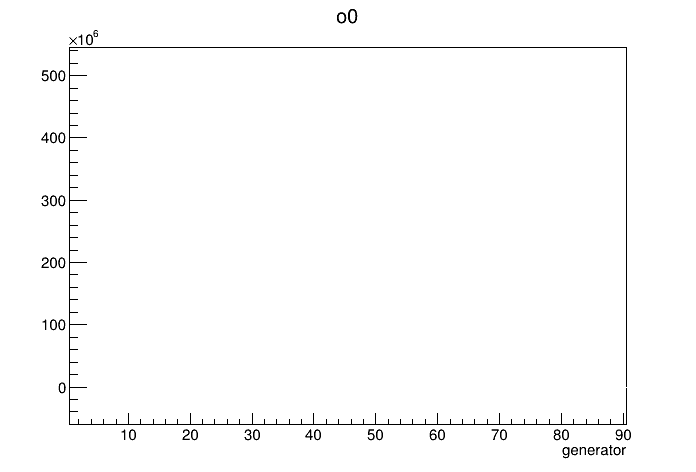

In [11]:
orientation = ROOT.TUnfold.kHistMapOutputHoriz
regMode = ROOT.TUnfold.kRegModeCurvature
con = ROOT.TUnfold.kEConstraintArea #ROOT.TUnfold.kEConstraintArea
mode =  ROOT.TUnfoldDensity.kDensityModeBinWidth
axisSteering =  "*[UOB]"
u_list = []
o_list = []
i=0
u_list.append(ROOT.TUnfoldDensity(jk_dic_root[str(i)],orientation,regMode,con))

u_list[i].SetInput(h)


nScan=50
tauMin=0.0
tauMax=0.0
iBest=0

logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
u_list[i].ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
o_list.append( u_list[i].GetOutput("o"+str(i)))


a = u_list[0].GetEmatrixSysUncorr('mat')


c_output = ROOT.TCanvas()
o_list[i].SetLineColor(i)
o_list[i].Draw("hist same")
c_output.Draw()

In [12]:
# #u = ROOT.TUnfoldDensity(M, orientation, regMode, con, mode, genBin, detBin, "signal", axisSteering)
# u_list = []
# o_list = []

# for i in range(10):
#     print(i)
#     u_list.append(ROOT.TUnfoldDensity(jk_dic_root[str(i)],orientation,regMode,con))

#     u_list[i].SetInput(h)


#     nScan=50
#     tauMin=0.0
#     tauMax=0.0
#     iBest=0

#     logTauX = ROOT.MakeNullPointer(ROOT.TSpline)
#     logTauY = ROOT.MakeNullPointer(ROOT.TSpline)
#     lCurve = ROOT.MakeNullPointer(ROOT.TGraph)
#     u_list[i].ScanLcurve(nScan,tauMin,tauMax,lCurve,logTauX,logTauY)
# for i in range(10):
#     o_list.append( u_list[i].GetOutput("o"+str(i)))

# a = u_list[0].GetEmatrixSysUncorr('mat')
# c_output = ROOT.TCanvas()
# for i in range(10):
#     o_list[i].SetLineColor(i)
#     o_list[i].Draw("hist same")
    
# c_output.Draw()

In [13]:
# %jsroot
# c_new = ROOT.TCanvas()
# o_unc.SetLineWidth(2)
# o_unc.SetFillColor(2)
# o_unc.SetFillStyle(2)
# o_unc.Draw('e')
# c_new.Draw()